<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/FinalCode/LIGOGlitchNoiseClassificationModelBuild_Iter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os
base_dir = "gdrive/My Drive/Colab Notebooks/GlitchNoiseClassification/"
seta = 'Glitch'
setb = 'Noise'

data_dir = os.path.join(base_dir, 'Data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from keras import regularizers
import numpy as np

In [0]:
setb_data_fnnames = np.delete(setb_data_fnnames, (762), axis=0)

In [0]:
setb_data_fnnames = np.delete(setb_data_fnnames, (67), axis=0)

In [0]:
seta_data_fnnames = np.delete(seta_data_fnnames, (2499), axis=0)

In [0]:
seta_data_fnnames = np.delete(seta_data_fnnames, (2498), axis=0)

In [1]:
len(q)

NameError: ignored

In [0]:
import numpy as np
import cv2
q1 = np.empty((1, 150, 150, 3))
q2 = np.empty((1, 150, 150, 3))
for a in range(1, len(seta_data_fnnames), 1):
  img_path_a = os.path.join(seta_data_dir, seta_data_fnnames[a])
  img_a = cv2.imread(os.path.join(seta_data_dir, seta_data_fnnames[a]))
  img_a = cv2.resize(img_a, (150, 150))
  q1 = np.vstack((q1, img_to_array(img_a).reshape(1, 150, 150, 3)))
  t1 = np.ones([len(seta_data_fnnames),1])
  
for b in range(1, len(setb_data_fnnames), 1):
  img_path_b = os.path.join(setb_data_dir, setb_data_fnnames[b])
  img_b = cv2.imread(os.path.join(setb_data_dir, setb_data_fnnames[b]))
  img_b = cv2.resize(img_b, (150, 150))
  q2 = np.vstack((q2, img_to_array(img_b).reshape(1, 150, 150, 3)))
  t2 = np.zeros([len(setb_data_fnnames),1])

In [0]:
t = np.vstack((t1, t2))
q = np.vstack((q1, q2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3371 samples, validate on 375 samples
Epoch 1/2
3371/3371 [==============================] - 555s 165ms/sample - loss: 1.2625 - acc: 0.9508 - val_loss: 4.2663e-06 - val_acc: 1.0000
Epoch 2/2
1250/1250 [==============================] - 53s 42ms/sample - loss: 8.3482e-04 - acc: 1.0000
acc: 100.00%


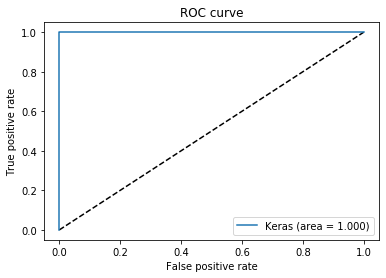

Confusion Matrix :
 [[1. 0.]
 [0. 1.]]
Classioficaton Report :
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       625
     class 1       1.00      1.00      1.00       625

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250

Precision score: 1.0
Recall score: 1.0
f1_score : 1.0
fbeta_score_0.5 : 1.0
fbeta_score_1 : 1.0
fbeta_score_2 : 1.0
precision_recall_fscore_support : (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([625, 625]))
Train on 3371 samples, validate on 375 samples
Epoch 1/2


In [0]:
#Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import regularizers
import tensorflow as tf
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [0]:
# create model
img_input = layers.Input(shape=(150, 150, 3))

# 2D Conv Layer with 64 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 128 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(128, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 256 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(256, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)

# Faltten Layer
x = layers.Flatten()(x)

# Fully Connected Layers and ReLU activation algoritm
#x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(4096, activation = 'relu')(x)

# Dropout Layer for Optimization
x = layers.Dropout(0.5,noise_shape=None, seed=None)(x)
  
x = layers.Dense(1000, activation = 'relu')(x)

# Dropout Layer for Optimization
x = layers.Dropout(0.5,noise_shape=None, seed=None)(x)

# Fully connected layers and sigmoid activation algorithm
output = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(img_input, output)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(q, t, test_size=0.2, shuffle=True)

In [0]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005), metrics = ['accuracy'])
# Fit the model
#model.fit(q[train], t[train], epochs=2, batch_size=32, verbose=1)
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1, verbose = 1, shuffle=True)

In [0]:
y_pred = model.predict(q[test])
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=None)
from sklearn.metrics import auc
auc = auc(fpr, tpr)

nsamples, nx, ny, nz = X_train.shape
nsamplesx, nxx, nyx, nzx = X_test.shape
train_dataset = X_train.reshape((nsamples,nx*ny*nz))
test_dataset = X_test.reshape((nsamplesx,nxx*nyx*nzx))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
  
accuracy_score(y_test,  y_pred.round(), normalize=True, sample_weight=None)
hamming_loss(y_test, y_pred.round())
cm = confusion_matrix(y_test, y_pred.round())
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix :\n', cm)
target_names = ['class 0', 'class 1']
print('Classioficaton Report :\n', classification_report(y_test, y_pred.round(), target_names=target_names))
print('Precision score:', metrics.precision_score(y_test, y_pred.round()))
print('Recall score:', metrics.recall_score(y_test, y_pred.round()))
print('f1_score :', metrics.f1_score(y_test, y_pred.round()))  
print('fbeta_score_0.5 :', metrics.fbeta_score(y_test, y_pred.round(), beta=0.5))
print('fbeta_score_1 :', metrics.fbeta_score(y_test, y_pred.round(), beta=1)) 
print('fbeta_score_2 :', metrics.fbeta_score(y_test, y_pred.round(), beta=2)) 
print('precision_recall_fscore_support :', metrics.precision_recall_fscore_support(y_test, y_pred.round(), beta=0.5))

In [0]:
y_pred[53]

array([1.], dtype=float32)

In [0]:
array_to_img(cv2.resize(X_test[53], (300, 300)))

NameError: ignored

In [0]:
import numpy as np
cal_glitch = 0
cal_noise = 0
cal_unconclusive = 0

alist=[]
for fname in seta_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(seta_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]>0.5):
        cal_glitch+=1
    elif(pred_img[0]<0.5):
        cal_noise+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
#print(alist)

print("Identified as: \n")
print("Glitch :", cal_glitch)
print("Noise :", cal_noise)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_glitch/(cal_glitch+cal_unconclusive+cal_noise))*100)
a = (cal_glitch/(cal_glitch+cal_unconclusive+cal_noise))*100

Identified as: 

Glitch : 1803
Noise : 1
Inconclusive : 0
Percentage : 99.94456762749445


In [0]:
import numpy as np
cal_glitch = 0
cal_noise = 0
cal_unconclusive = 0

alist=[]
for fname in setb_data_fnnames:
    if fname.startswith("."):
        continue
    file_path = os.path.join(setb_data_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]<0.5):
        cal_noise+=1
    elif(pred_img[0]>0.5):
        cal_glitch+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
#print(alist)

print("Identified as: \n")
print("Glitch :", cal_glitch)
print("Noise :", cal_noise)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_noise/(cal_glitch+cal_unconclusive+cal_noise))*100)
a = (cal_noise/(cal_glitch+cal_unconclusive+cal_noise))*100

Identified as: 

Glitch : 0
Noise : 1804
Inconclusive : 0
Percentage : 100.0
